<a href="https://colab.research.google.com/github/nitish-pandey/Image-ClassiFier-using-CNN-GTSRB/blob/main/GTSRB_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import random
import cv2 as cv

In [2]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
# Download class names
! wget https://raw.githubusercontent.com/georgesung/traffic_sign_classification_german/master/signnames.csv -P data

--2021-10-06 06:57:54--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M  10.8MB/s    in 28s     

2021-10-06 06:58:23 (9.50 MB/s) - ‘GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]

--2021-10-06 06:58:23--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88978620 (85M) [application/zip]
Saving to: ‘GTSRB_Final_Test_Images.zip’

GTSRB_Final_Test_Im 100%[===================>]  84.8

In [ ]:
!unzip /content/GTSRB_Final_Test_Images.zip
!unzip /content/GTSRB_Final_Training_Images.zip

###Class id and respective name

In [4]:
data=pd.read_csv('/content/data/signnames.csv')
data.head(43)


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


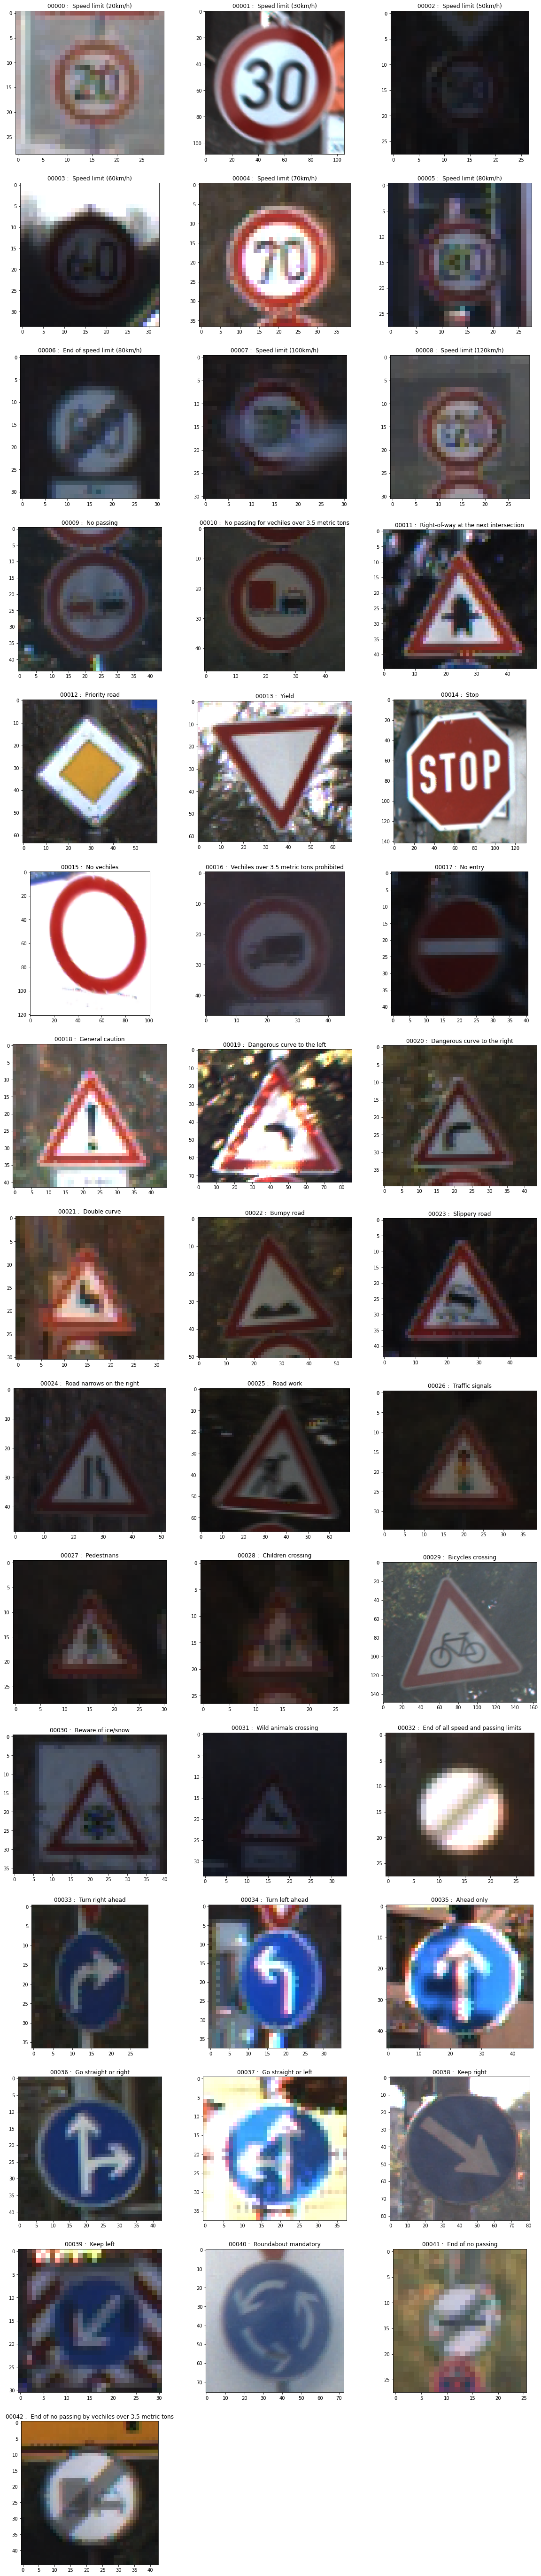

In [5]:
list1=data.SignName
dir='GTSRB/Final_Training/Images/'
list=os.listdir(dir)
list=sorted(list)
plt.figure(figsize=(20,100))
i=0
for i in range(43):
    path='{}/{}'.format(dir,list[i])
    random_filename = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
    ])
    plt.subplot(15,3,i+1)
    random_filename='{}/{}/{}'.format(dir,list[i],random_filename)
    img=plt.imread(random_filename)
    plt.title('{} :  {}'.format(list[i],list1[i]))
    plt.imshow(img)

plt.savefig('img.png',dpi=400)
plt.show()

In [8]:
length=[]
height=[]
for i in range(43):
    path='/content/GTSRB/Final_Training/Images/{}'.format(list[i])
    length.append(len(os.listdir(path)))
    height.append(i)
print('Class Id   Class count     Class Name\n')
for i in range(43):
    print('{}      {}         {}\n'.format(list[i],length[i],list1[i]))

Class Id   Class count     Class Name

00000      211         Speed limit (20km/h)

00001      2221         Speed limit (30km/h)

00002      2251         Speed limit (50km/h)

00003      1411         Speed limit (60km/h)

00004      1981         Speed limit (70km/h)

00005      1861         Speed limit (80km/h)

00006      421         End of speed limit (80km/h)

00007      1441         Speed limit (100km/h)

00008      1411         Speed limit (120km/h)

00009      1471         No passing

00010      2011         No passing for vechiles over 3.5 metric tons

00011      1321         Right-of-way at the next intersection

00012      2101         Priority road

00013      2161         Yield

00014      781         Stop

00015      631         No vechiles

00016      421         Vechiles over 3.5 metric tons prohibited

00017      1111         No entry

00018      1201         General caution

00019      211         Dangerous curve to the left

00020      361         Dangerous curve to th

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


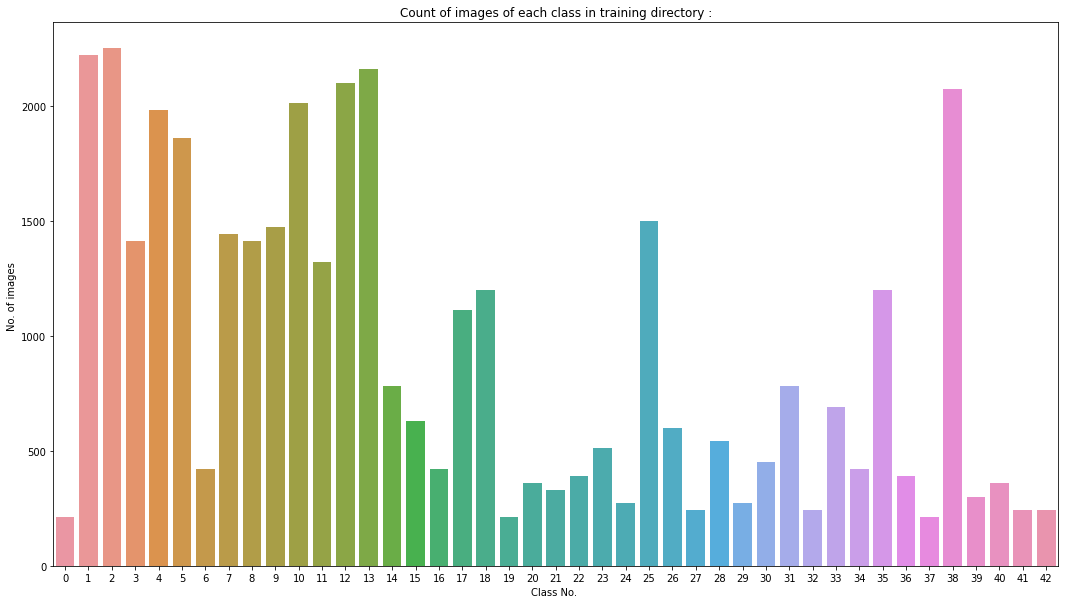

In [9]:
plt.figure(figsize=(18,10))
plt.title('Count of images of each class in training directory :')
plt.xlabel('Class No. ')
plt.ylabel('No. of images ')
sns.barplot(height,length)
plt.savefig('image.png',dpi=400)
plt.show()